In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler,StandardScaler

### 数据预处理
> **df**为预处理后的dataframe
> 
> **data**为预处理后的numpy类型数组 

In [4]:
Path = "data\空气质量监测数据.xlsx"
df = pd.read_excel(Path, usecols=range(0, 16),na_values=["-99.0(E)","0.0(E)"])
print(df.isnull().sum())
data = np.array(df)
data = data[1:8642]
# 删除经度纬度以及缺失的列
data = np.delete(data, [1, 2, 7], axis=1)
df = pd.DataFrame(data[:, 1:13],  dtype=float)
# 对缺失值进行线性插值处理
df = df.interpolate(method="linear")
data[:, 1:13] = np.array(df)
# 对异常值进行处理
for i in range(1,13):
    d = data[:,i]
    ave = np.average(d)
    std = np.std(d)
    # print(ave,std,d)
    d[d>ave+3*std] = np.nan
    d[d<ave-3*std] = np.nan
    d[d<0] = np.nan
df = pd.DataFrame(data[:, 1:13],  dtype=float)
df = df.interpolate(method="linear")
data[:, 1:13] = np.array(df)
# 加入列名
df = pd.DataFrame(data, index=np.arange(0, 8641), columns=[
    "time",  "SO2", "CO", "NO2", "O3-1H", "PM10", "PM2.5", "NO", "NOX", "湿度", "温度", "风向", "大气压"])

with pd.ExcelWriter("data\空气质量监测数据_new.xlsx") as writer:
    df.to_excel(writer)
df

Unnamed: 0        0
Unnamed: 1        0
Unnamed: 2        0
Unnamed: 3        6
Unnamed: 4        6
Unnamed: 5       14
Unnamed: 6       15
Unnamed: 7     8641
Unnamed: 8       60
Unnamed: 9        6
Unnamed: 10     952
Unnamed: 11      11
Unnamed: 12       6
Unnamed: 13       7
Unnamed: 14       7
Unnamed: 15       6
dtype: int64


C:\Users\peng\AppData\Local\Temp\ipykernel_15124\3042994434.py:19: RuntimeWarning: invalid value encountered in less
  d[d<ave-3*std] = np.nan
C:\Users\peng\AppData\Local\Temp\ipykernel_15124\3042994434.py:20: RuntimeWarning: invalid value encountered in less
  d[d<0] = np.nan


,time,SO2,CO,NO2,O3-1H,PM10,PM2.5,NO,NOX,湿度,温度,风向,大气压
0,2020/06/01 00:00:00,10.0,0.5,62.0,9.0,58.0,29.0,10.0,77.0,65.0,18.8,296.0,1004.6
1,2020/06/01 00:05:00,10.0,0.5,64.0,12.0,56.0,23.0,9.0,78.0,64.0,18.9,294.0,1004.6
2,2020/06/01 00:10:00,10.0,0.5,65.0,8.0,56.0,23.0,6.0,73.0,63.0,19.0,294.0,1004.5
3,2020/06/01 00:15:00,10.0,0.5,67.0,5.0,56.0,23.0,8.0,80.0,63.0,19.1,295.0,1004.5
4,2020/06/01 00:20:00,10.0,0.5,71.0,4.0,56.0,23.0,10.0,86.0,63.0,19.1,295.0,1004.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2020/06/30 23:40:00,16.0,1.0,47.0,132.0,90.0,69.0,2.0,50.0,78.0,25.7,85.0,999.3
8637,2020/06/30 23:45:00,16.0,1.0,47.0,122.0,90.0,69.0,2.0,49.0,78.0,25.7,85.0,999.3
8638,2020/06/30 23:50:00,16.0,1.0,48.0,124.0,90.0,69.0,1.0,50.0,78.0,25.6,85.0,999.3
8639,2020/06/30 23:55:00,16.0,1.0,42.0,129.0,90.0,69.0,2.0,45.0,78.0,25.6,85.0,999.3


### 原始可视化

#### 画在一张图上

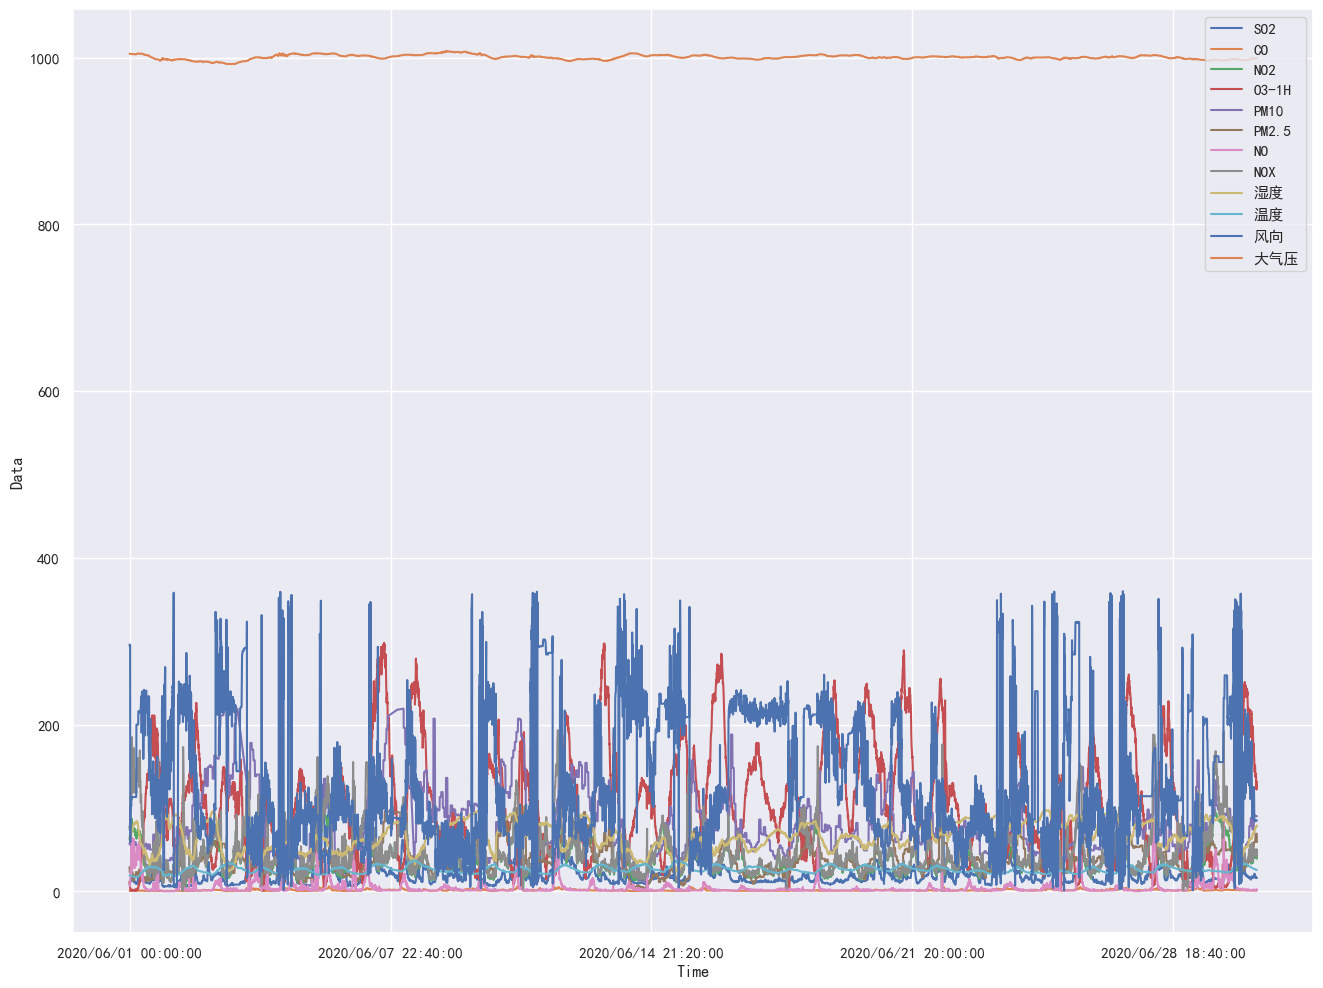

In [5]:
# 显示中文
rc = {'axes.unicode_minus': False}
sns.set_theme(style="darkgrid", context='notebook', rc=rc, font='SimHei')

plt.figure(figsize=(16, 12))
columns = df.columns
for i in columns:
    if i == "time":
        continue
    sns.lineplot(data=df, x="time", y=i,label=i)
# 只部分显示数据
x = np.arange(0, 8642, dtype=int)
plt.xticks(ticks=x[::2000])
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Data")
plt.show()

#### 分开画在一张图上
##### SO2箱线图

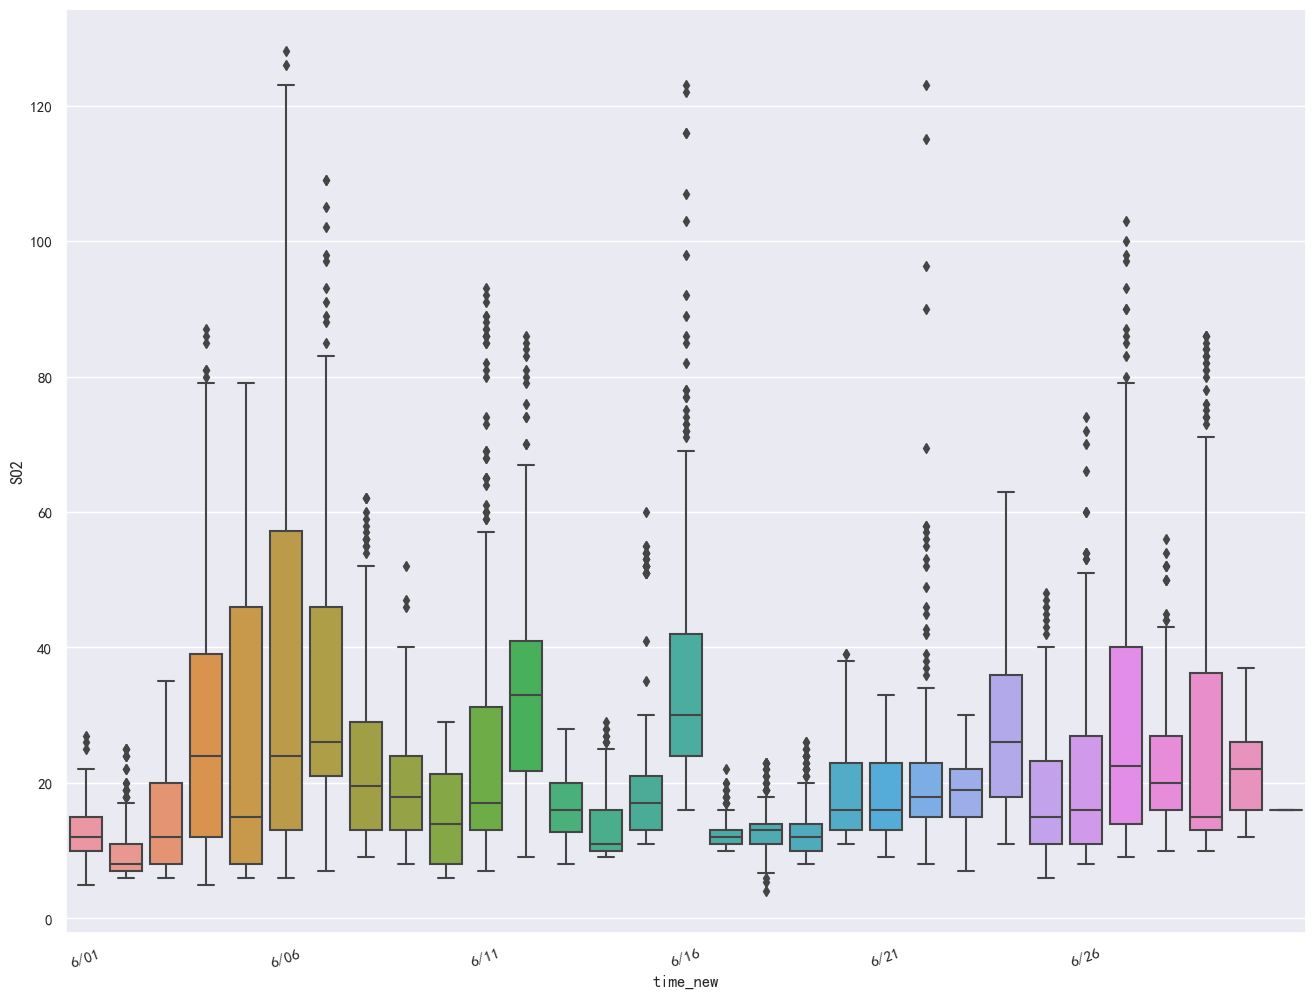

In [6]:

new_time =[]
for i in range (data.shape[0]):
    new_time.append(data[i,0][6:10])
new_time = np.array(new_time)
data_new = np.insert(data,0,new_time,axis = 1)
df_new = pd.DataFrame(data_new,columns=["time_new","time",  "SO2", "CO", "NO2", "O3-1H", "PM10", "PM2.5", "NO", "NOX", "湿度", "温度", "风向", "大气压"])

# 绘制箱线图
plt.figure(figsize=(16,12))
sns.boxplot(df_new,x= "time_new",y = "SO2")

plt.xticks(ticks=np.arange(0,30,5),rotation=20)
plt.show()

##### NOX小提琴图

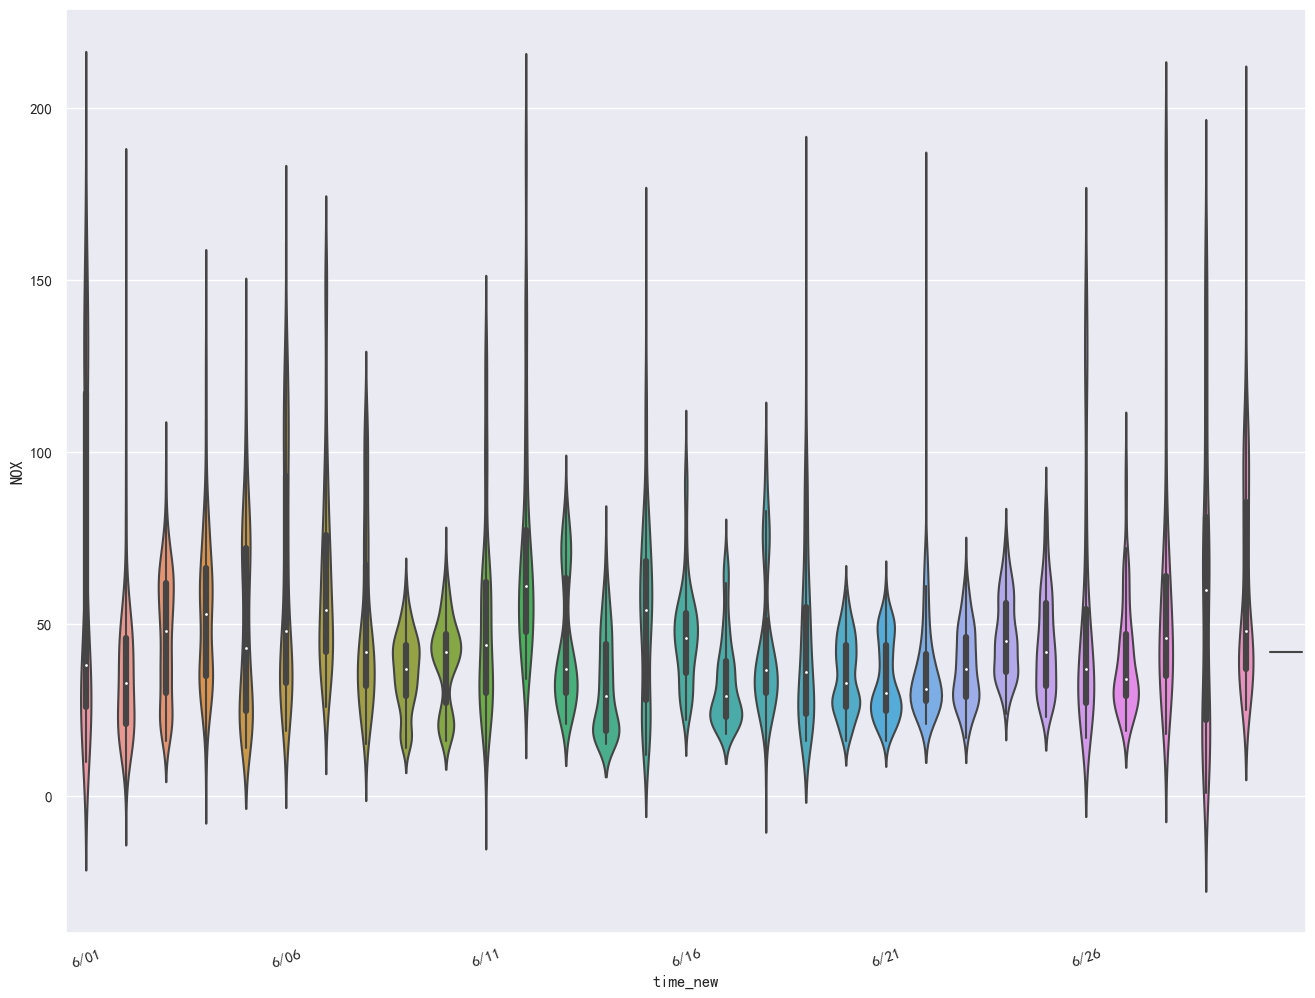

In [7]:
# 绘制小提琴
plt.figure(figsize=(16,12))
sns.violinplot(x=df_new["time_new"], y=df_new["NOX"].astype(float))
plt.xticks(ticks=np.arange(0,30,5),rotation = 20)
plt.show()

#### CO误差折线图

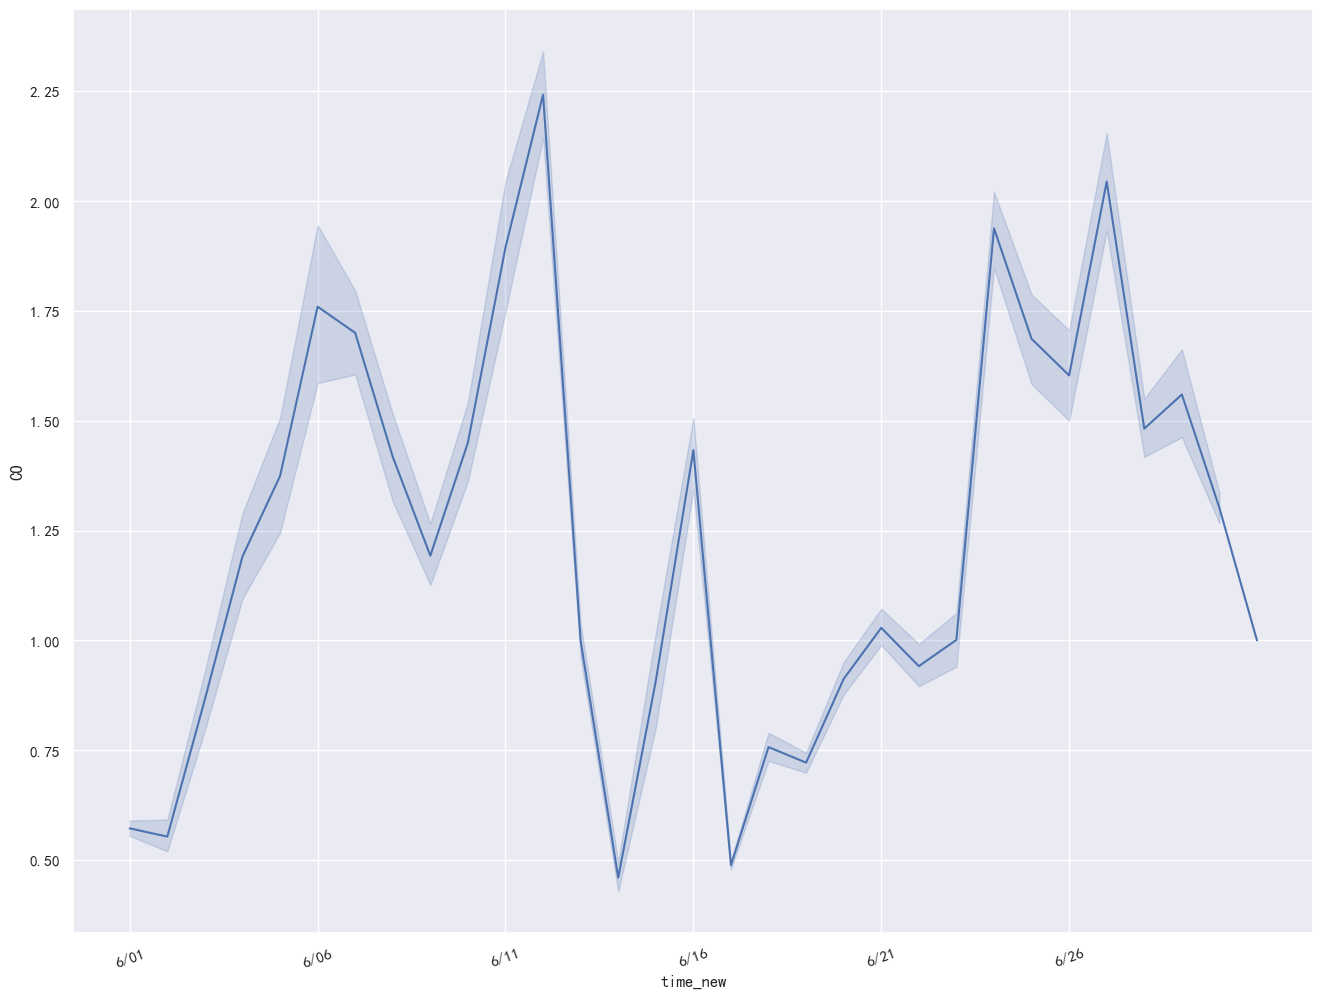

In [8]:
# CO误差折线图
plt.figure(figsize=(16, 12))
sns.lineplot(x=df_new["time_new"], y=df_new["CO"].astype(float))
plt.xticks(ticks=np.arange(0, 30, 5), rotation=20)
plt.show()

#### NO2增强信值图

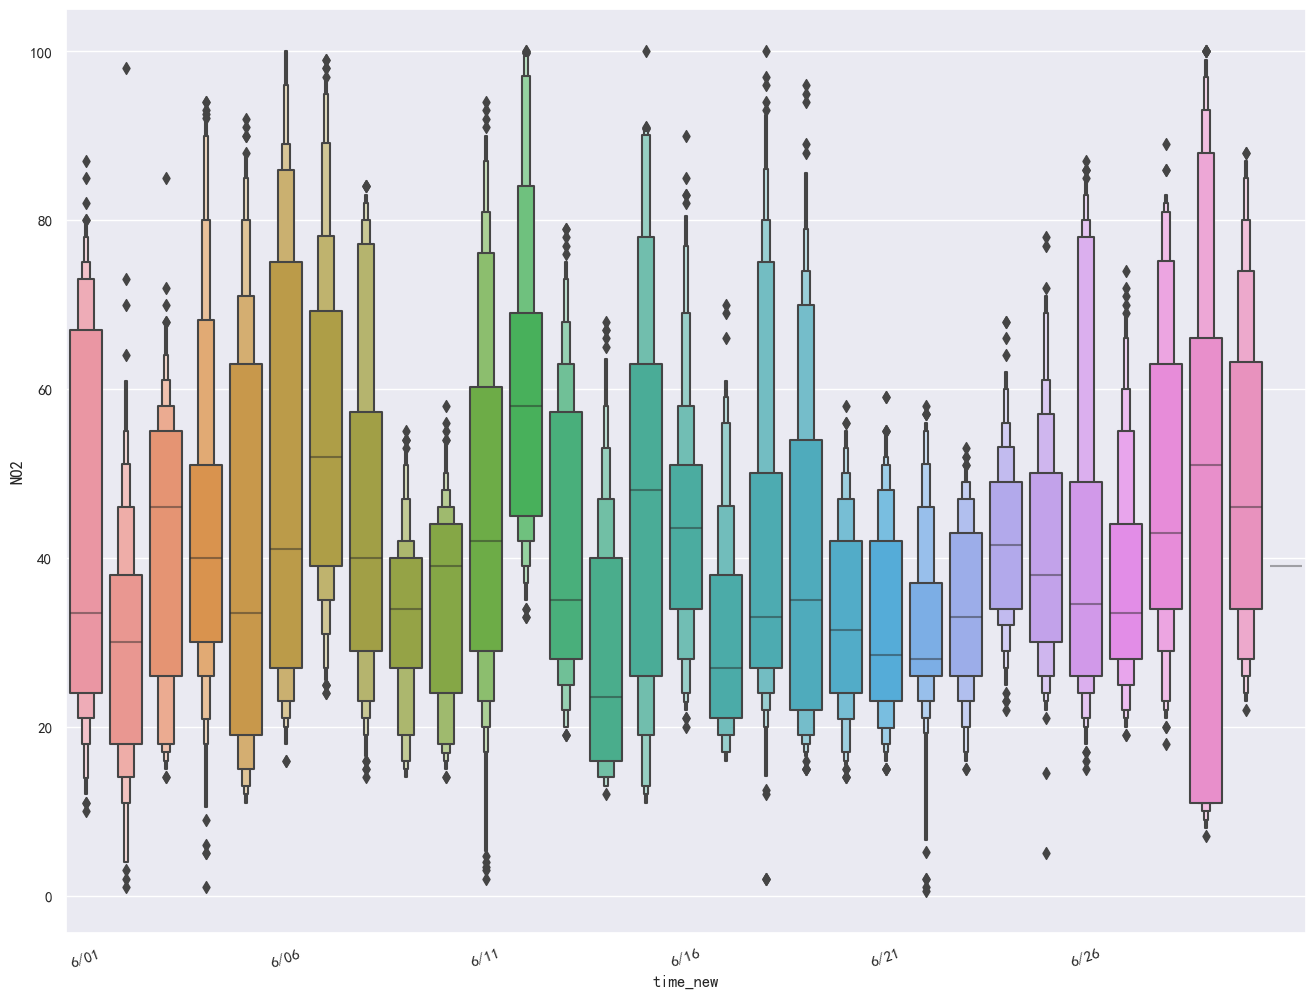

In [9]:
# NO2增强信值图
plt.figure(figsize=(16, 12))
sns.boxenplot(df_new, x="time_new", y="NO2")
plt.xticks(ticks=np.arange(0, 30, 5), rotation=20)
plt.show()

##### 误差柱状图

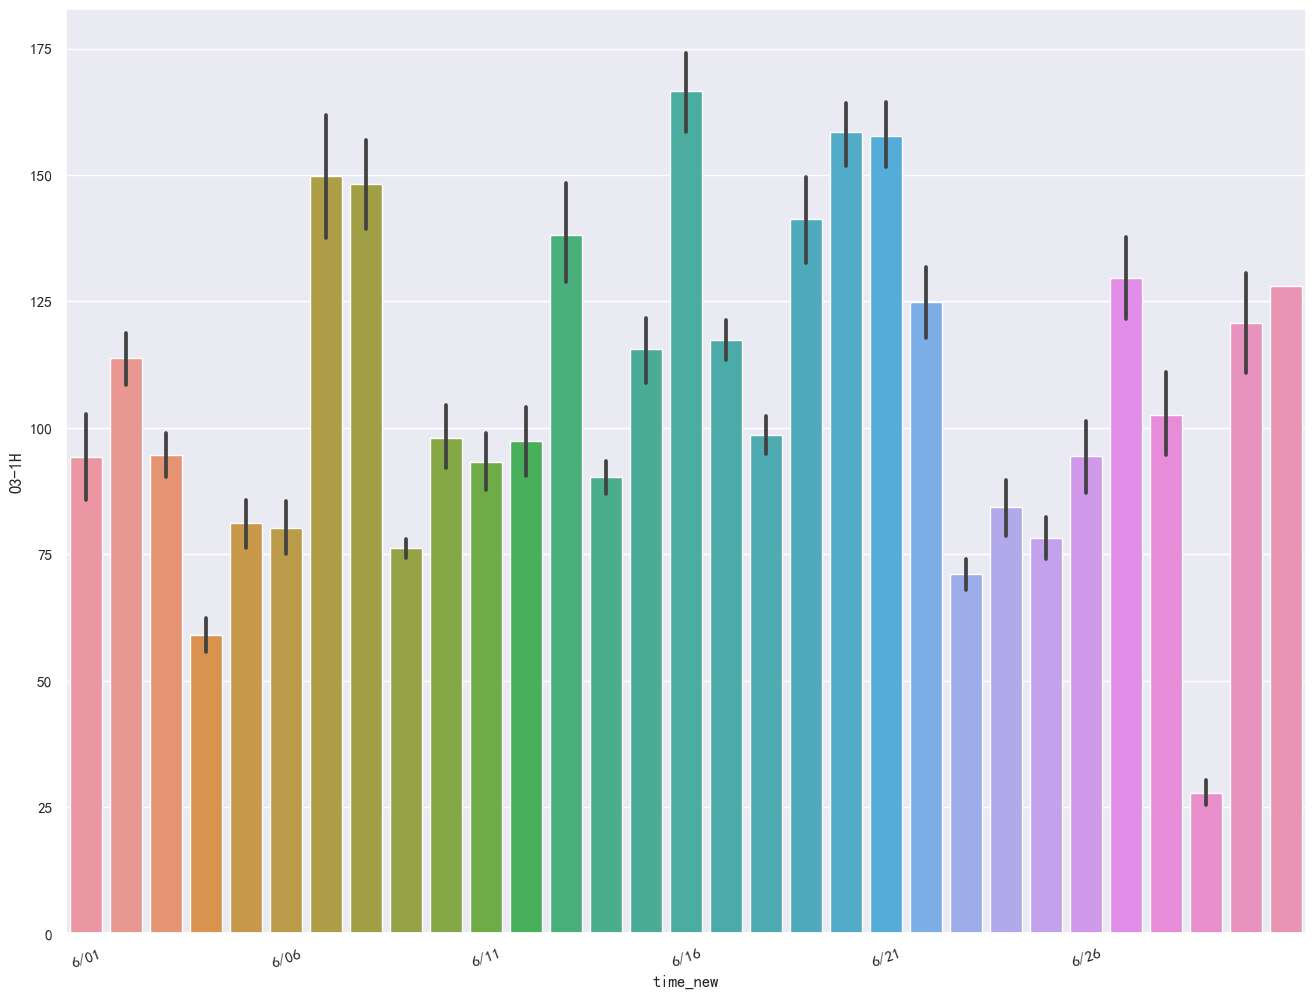

In [10]:
# O3-1H误差柱状图
plt.figure(figsize=(16, 12))
sns.barplot(x=df_new["time_new"], y=df_new["O3-1H"].astype(float))
plt.xticks(ticks=np.arange(0, 30, 5), rotation=20)
plt.show()

#### 面积图

In [11]:
# # PM10 面积图跑一次大概11min出图 后期打算放到colab上跑
# plt.figure(figsize=(16, 12))
# p = so.Plot(df_new["time"],df_new["PM10"].astype(float)).add(so.Area()).layout(size=(16,12))
# p

#### 归一化
> 最大最小归一化
> 
> Z-score归一化

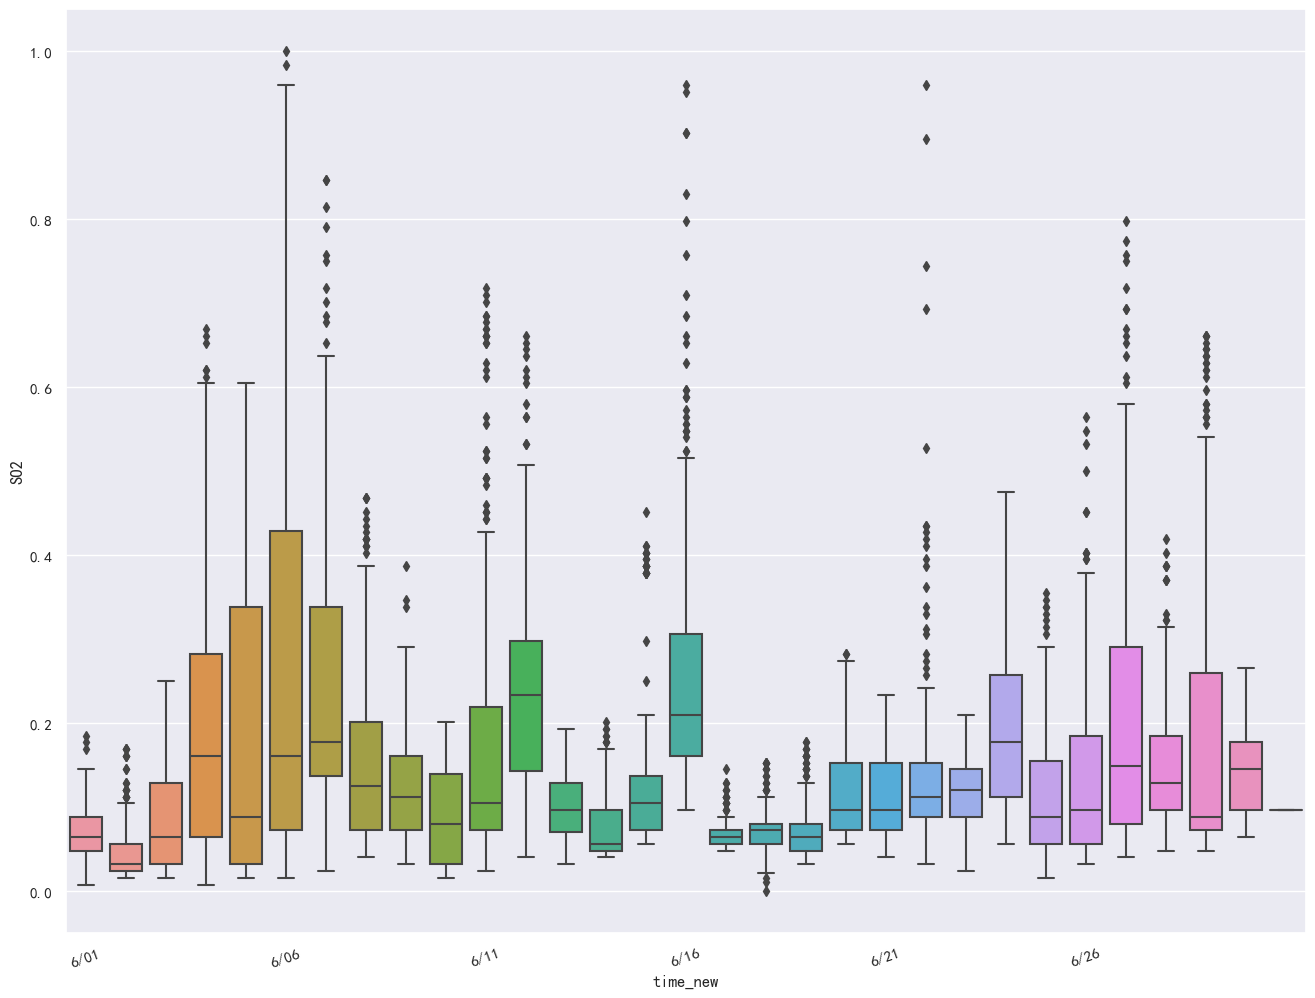

In [12]:
# 创建对象
scalar = MinMaxScaler()
scaled_minmax_data = scalar.fit_transform(data[:,1:])
scaled_minmax_data
scalar = StandardScaler()
scaled_standard_data = scalar.fit_transform(data[:,1:])
scaled_standard_data
scaled_df = pd.DataFrame(scaled_minmax_data, columns=[
    "SO2", "CO", "NO2", "O3-1H", "PM10", "PM2.5", "NO", "NOX", "湿度", "温度", "风向", "大气压"])
# 绘制箱线图
plt.figure(figsize=(16, 12))
sns.boxplot(x=df_new["time_new"],y= scaled_df["SO2"])

plt.xticks(ticks=np.arange(0, 30, 5), rotation=20)
plt.show()

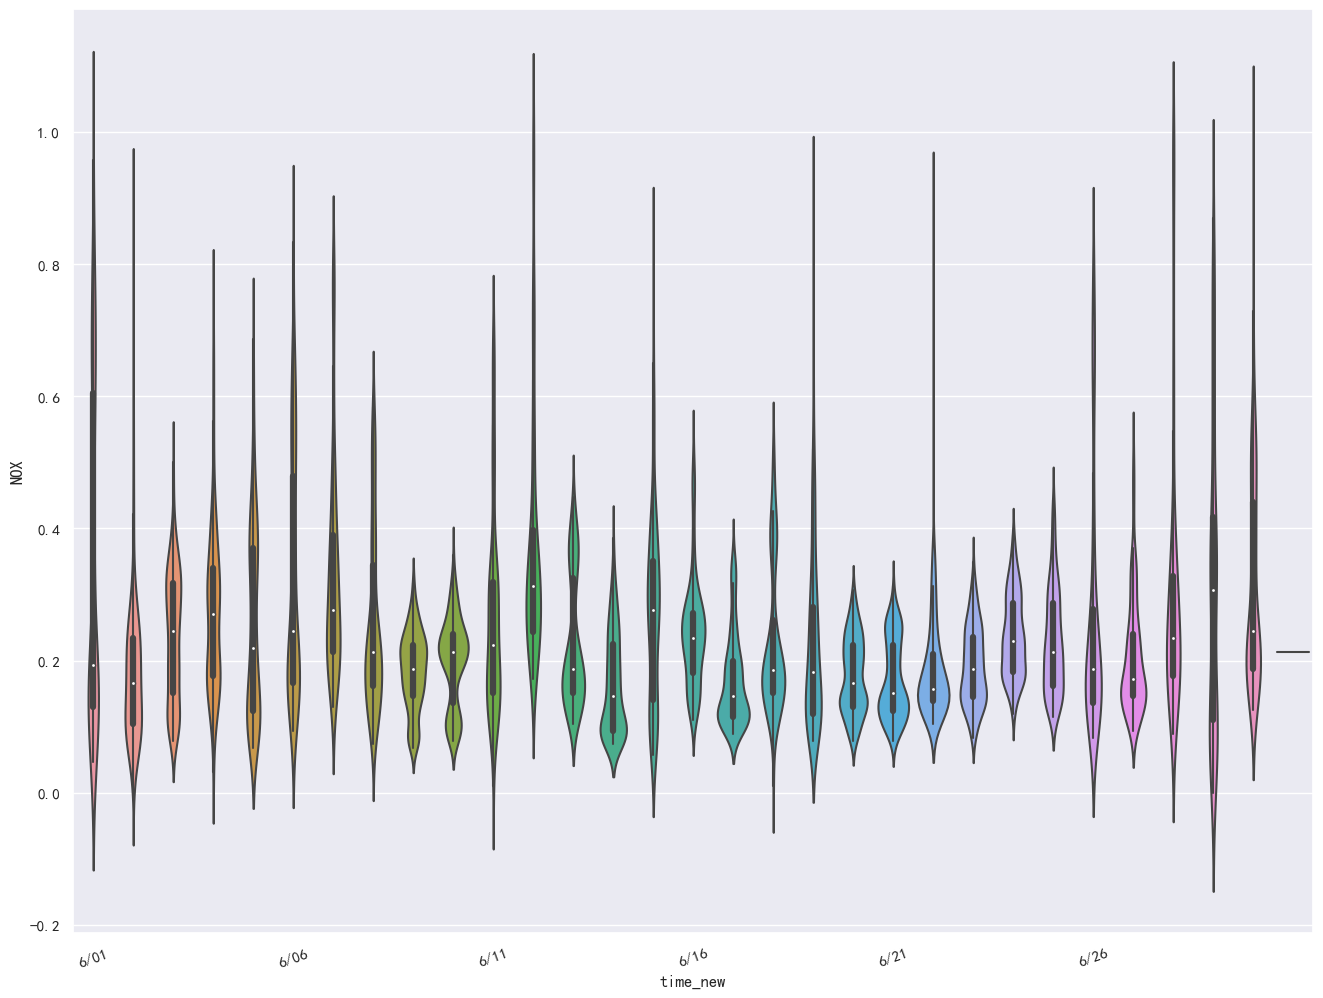

In [13]:
# 绘制小提琴
plt.figure(figsize=(16, 12))
sns.violinplot(x=df_new["time_new"], y=scaled_df["NOX"].astype(float))
plt.xticks(ticks=np.arange(0, 30, 5), rotation=20)
plt.show()

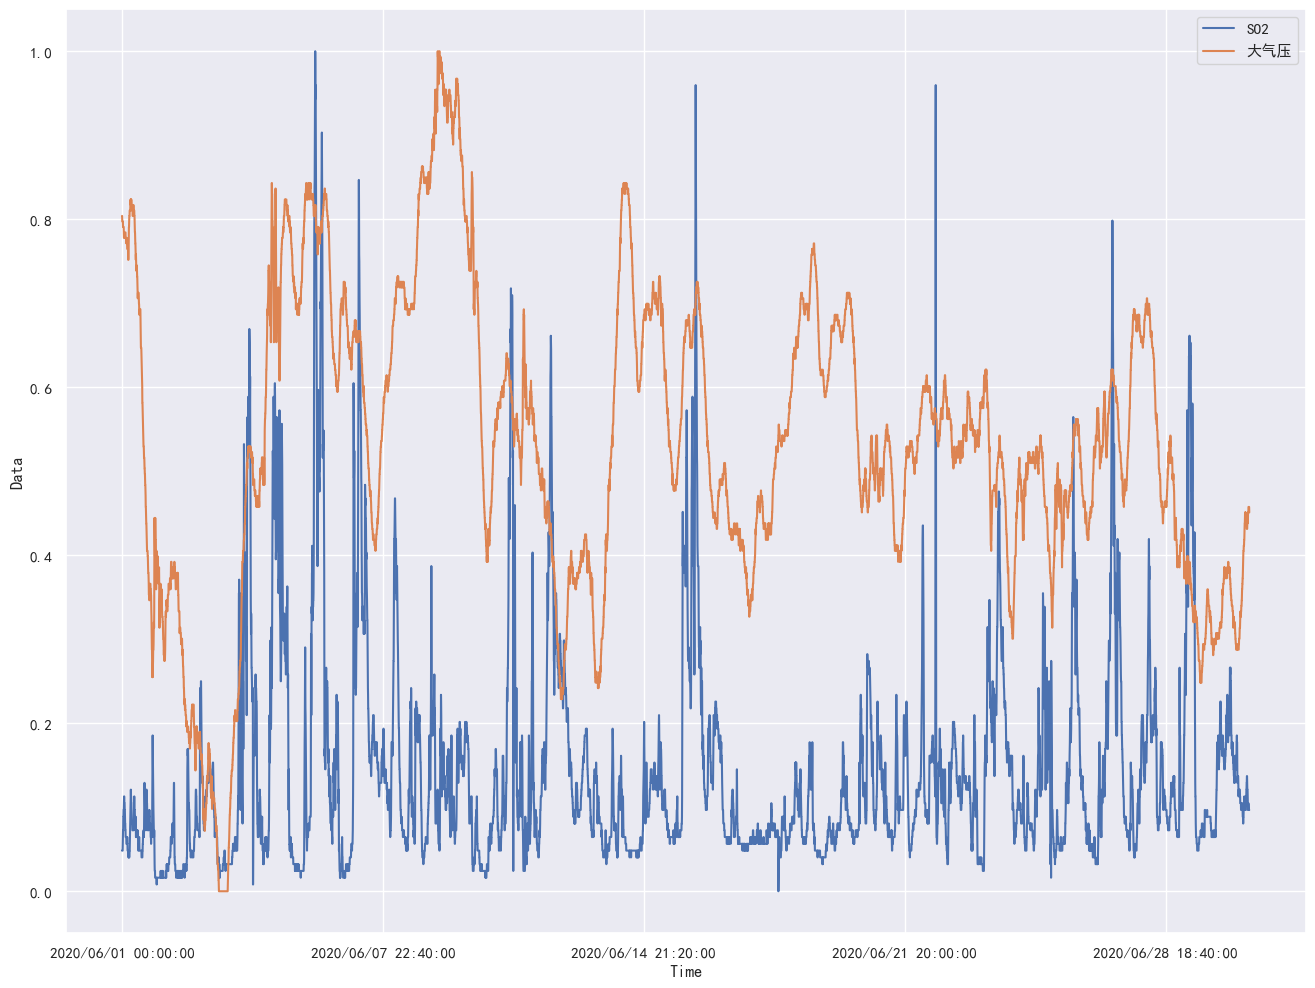

In [14]:
# 显示中文
rc = {'axes.unicode_minus': False}
sns.set_theme(style="darkgrid", context='notebook', rc=rc, font='SimHei')

plt.figure(figsize=(16, 12))
for i in ["SO2","大气压"]:
    sns.lineplot(x=df["time"], y=scaled_df[i], label=i)
# 只部分显示数据
x = np.arange(0, 8642, dtype=int)
plt.xticks(ticks=x[::2000])
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Data")
plt.show()

### 归一化后可视化同上

### 相关性分析

In [15]:
scaled_df = pd.DataFrame(scaled_minmax_data, columns=[
      "SO2", "CO", "NO2", "O3-1H", "PM10", "PM2.5", "NO", "NOX", "湿度", "温度", "风向", "大气压"])
df_1 = pd.DataFrame(data[:, 1:], columns=[
    "SO2", "CO", "NO2", "O3-1H", "PM10", "PM2.5", "NO", "NOX", "湿度", "温度", "风向", "大气压"])
scaled_df.corr(method='pearson')
scaled_df.corr(method='kendall')
scaled_df.corr(method='spearman')
with pd.ExcelWriter("data\\相关系数矩阵.xlsx") as writer:
    scaled_df.corr(method='spearman').to_excel(writer)
df_1

,SO2,CO,NO2,O3-1H,PM10,PM2.5,NO,NOX,湿度,温度,风向,大气压
0,10.0,0.5,62.0,9.0,58.0,29.0,10.0,77.0,65.0,18.8,296.0,1004.6
1,10.0,0.5,64.0,12.0,56.0,23.0,9.0,78.0,64.0,18.9,294.0,1004.6
2,10.0,0.5,65.0,8.0,56.0,23.0,6.0,73.0,63.0,19.0,294.0,1004.5
3,10.0,0.5,67.0,5.0,56.0,23.0,8.0,80.0,63.0,19.1,295.0,1004.5
4,10.0,0.5,71.0,4.0,56.0,23.0,10.0,86.0,63.0,19.1,295.0,1004.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,16.0,1.0,47.0,132.0,90.0,69.0,2.0,50.0,78.0,25.7,85.0,999.3
8637,16.0,1.0,47.0,122.0,90.0,69.0,2.0,49.0,78.0,25.7,85.0,999.3
8638,16.0,1.0,48.0,124.0,90.0,69.0,1.0,50.0,78.0,25.6,85.0,999.3
8639,16.0,1.0,42.0,129.0,90.0,69.0,2.0,45.0,78.0,25.6,85.0,999.3


### 相关性分析可视化

In [16]:
rc = {'axes.unicode_minus': False}
sns.set_theme(style="ticks", context="notebook", rc=rc, font='SimHei')
# 出图时间较长，打算后期传到colab上跑出来结果
sns.pairplot(df_1)

d:\miniconda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [ ]:
plt.figure(figsize=(16,12))

sns.clustermap(scaled_df.corr(), cmap='PuRd')

: 